Image shape: (288, 139, 130)


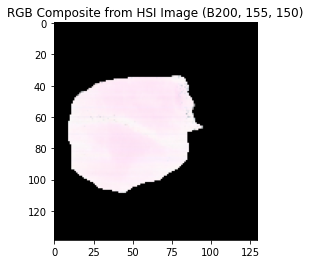

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

image_path = r'C:\Users\82102\Desktop\data\Anti-1-2.tif'

with rasterio.open(image_path) as dataset:
    # Read the image data
    hyperspectral_data = dataset.read()
    print(f"Image shape: {hyperspectral_data.shape}")  # 괄호 안에 변수명을 제대로 넣음

    red_band = hyperspectral_data[199, :, :]
    green_band = hyperspectral_data[154, :, :]
    blue_band = hyperspectral_data[149, :, :]

    rgb_composite = np.dstack((red_band, green_band, blue_band))  # 괄호로 묶어 튜플로 전달
    rgb_composite_normalized = rgb_composite / np.max(rgb_composite)  # 오타 수정: normalizeed → normalized, np-max → np.max

    plt.imshow(rgb_composite_normalized)
    plt.title('RGB Composite from HSI Image (B200, 155, 150)')
    plt.show()


In [2]:
import tkinter as tk
from tkinter import filedialog
import threading
from tkinter import ttk
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def browse_file():
    global image_path
    image_path = filedialog.askopenfilename(title="Select a Hyperspectral Image", filetypes=[("TIF Files", "*.tif")])
    progress['value'] = 0
    progress_label.config(text="File Selected")

def plot_rgb():
    def task():
        r_band = int(r_entry.get())
        g_band = int(g_entry.get())
        b_band = int(b_entry.get())

        with rasterio.open(image_path) as dataset:
            data = dataset.read()
            red = data[r_band - 1, :, :]
            green = data[g_band - 1, :, :]
            blue = data[b_band - 1, :, :]

            rgb = np.dstack((red, green, blue))
            rgb_norm = rgb / np.max(rgb)

            plt.imshow(rgb_norm)
            plt.title(f'RGB Composite (Bands {r_band}, {g_band}, {b_band})')
            plt.axis("off")
            plt.show()

            progress["value"] = 100
            progress_label.config(text="Display Complete!")

    threading.Thread(target=task).start()

# GUI 구성
root = tk.Tk()
root.title("Hyperspectral RGB Viewer")
root.geometry("500x350")

browse_button = tk.Button(root, text="Browse Hyperspectral Image", command=browse_file)
browse_button.pack(pady=10)

r_entry = tk.Entry(root)
r_entry.pack(pady=5)
r_entry.insert(0, "200")

g_entry = tk.Entry(root)
g_entry.pack(pady=5)
g_entry.insert(0, "155")

b_entry = tk.Entry(root)
b_entry.pack(pady=5)
b_entry.insert(0, "150")

plot_button = tk.Button(root, text="Plot RGB Composite", command=plot_rgb)
plot_button.pack(pady=10)

progress = ttk.Progressbar(root, orient="horizontal", length=400, mode="determinate")
progress.pack(pady=10)

progress_label = tk.Label(root, text="Progress")
progress_label.pack()

root.mainloop()


<ipython-input-6-faaa3b6e51ff>:10: RuntimeWarning: invalid value encountered in true_divide
  Math = (Band217 - Band213) / (Band217 + Band213)


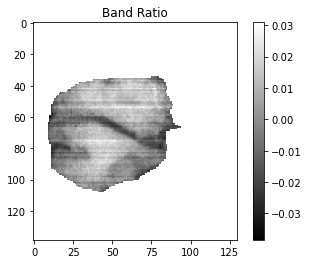

In [6]:
import rasterio 
import numpy as np 
import matplotlib.pyplot as plt
image_path = r'C:\Users\82102\Desktop\data\Anti-1-2.tif'
with rasterio.open(image_path) as dataset:
# Read the image data
    hyperspectral_data = dataset.read() 
Band217 = hyperspectral_data[216, :, :]
Band213 = hyperspectral_data[212, :, :]
Math = (Band217 - Band213) / (Band217 + Band213)
plt. imshow(Math, cmap='gray')
plt. colorbar()
plt. title('Band Ratio')
plt. show()

In [7]:
import tkinter as tk
from tkinter import filedialog
import threading
from tkinter import ttk
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def browse_file():
    global image_path
    image_path = filedialog.askopenfilename(title="Select Hyperspectral File", filetypes=[("TIF Files", "*.tif")])
    progress['value'] = 0
    progress_label.config(text="File Selected")

def calculate_band_math():
    def task():
        band1_number = int(band1_entry.get())
        band2_number = int(band2_entry.get())

        with rasterio.open(image_path) as dataset:
            data = dataset.read()
            band1 = data[band1_number - 1]
            band2 = data[band2_number - 1]

            math_result = (band1 - band2) / (band1 + band2 + 1e-6)  # 분모 0 방지용 보정
            plt.imshow(math_result, cmap='gray')
            plt.colorbar()
            plt.axis("off")
            plt.title(f"Band Math: (Band {band1_number} - Band {band2_number}) / (Band {band1_number} + Band {band2_number})")
            plt.show()

            progress['value'] = 100
            progress_label.config(text="Calculation Complete!")

    threading.Thread(target=task).start()

# GUI 설정
root = tk.Tk()
root.title("Hyperspectral Band Math Calculator")
root.geometry("500x350")

browse_button = tk.Button(root, text="Browse Hyperspectral File", command=browse_file)
browse_button.pack(pady=10)

band1_label = tk.Label(root, text="Enter Band 1 Number:")
band1_label.pack()
band1_entry = tk.Entry(root)
band1_entry.pack(pady=5)
band1_entry.insert(0, "217")

band2_label = tk.Label(root, text="Enter Band 2 Number:")
band2_label.pack()
band2_entry = tk.Entry(root)
band2_entry.pack(pady=5)
band2_entry.insert(0, "213")

calc_button = tk.Button(root, text="Calculate Band Math", command=calculate_band_math)
calc_button.pack(pady=10)

progress = ttk.Progressbar(root, orient="horizontal", length=400, mode="determinate")
progress.pack(pady=10)

progress_label = tk.Label(root, text="Progress")
progress_label.pack()

root.mainloop()

